<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# from google.colab import files
# uploaded = files.upload()

Saving submission.csv to submission.csv


## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
rnd = np.random.rand(4)
for col in num_cols:
  for i in range(len(data[col])):
    try:
      float(data[col][i])
    except:
      data[col][i] = 0
data[int(rnd[0] * len(data)): int(rnd[0] * len(data)) + 1].isna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4893,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data[int(rnd[1] * len(data)): int(rnd[1] * len(data)) + 1].isna()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
857,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data[int(rnd[2] * len(data)): int(rnd[2] * len(data)) + 1].isna()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2120,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data[int(rnd[3] * len(data)): int(rnd[3] * len(data)) + 1].isna()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
169,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
nan_dict = {}
data_nan = data.isna()
for column in feature_cols:
  count = 0
  for elem in (data_nan[column]):
    if (elem):
      count += 1
  nan_dict[column] = pd.Series(count, index=['count_nan'])
pd.DataFrame(nan_dict)
#все ячейки в data заполнены

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
count_nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

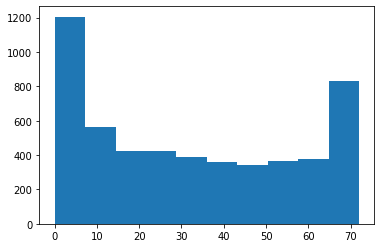

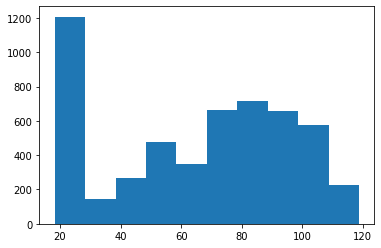

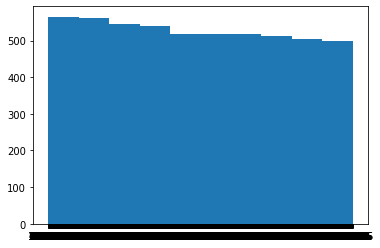

In [ ]:
for num_col in num_cols:
  gist_col = []
  for elem in data[num_col]:
    gist_col.append(elem)
  plt.hist(gist_col)
  plt.show()

Sex
balanced


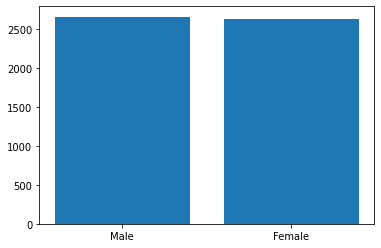

IsSeniorCitizen
unbalanced


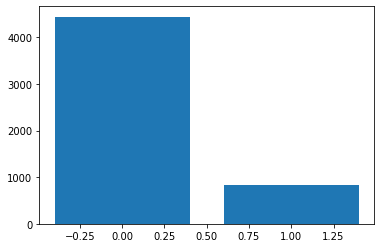

HasPartner
balanced


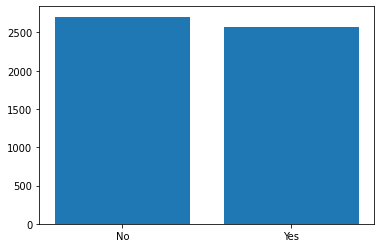

HasChild
unbalanced


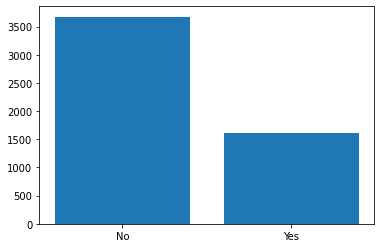

HasPhoneService
unbalanced


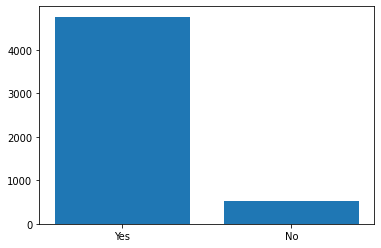

HasMultiplePhoneNumbers
unbalanced


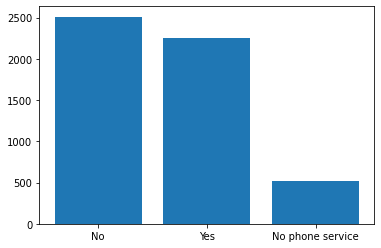

HasInternetService
unbalanced


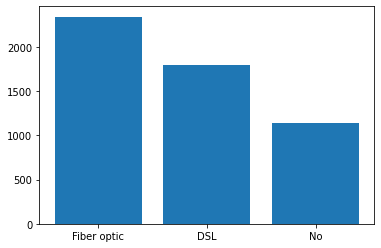

HasOnlineSecurityService
unbalanced


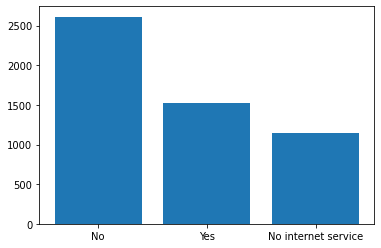

HasOnlineBackup
unbalanced


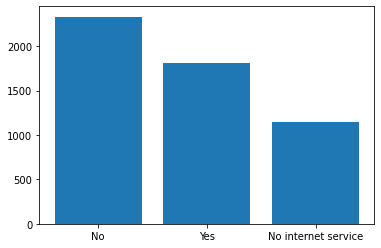

HasDeviceProtection
unbalanced


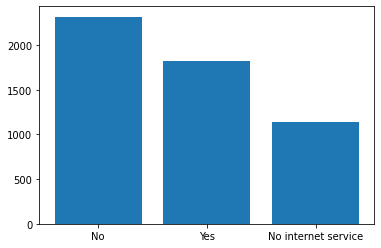

HasTechSupportAccess
unbalanced


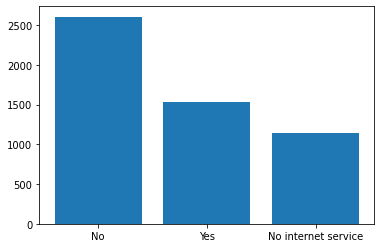

HasOnlineTV
unbalanced


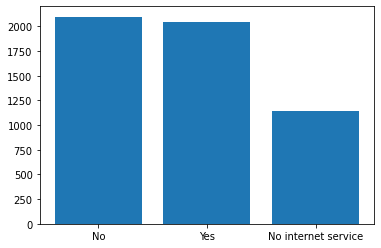

HasMovieSubscription
unbalanced


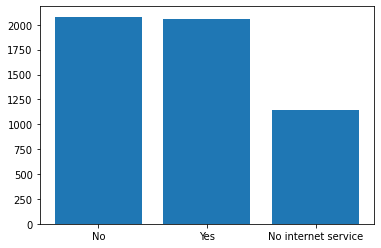

HasContractPhone
unbalanced


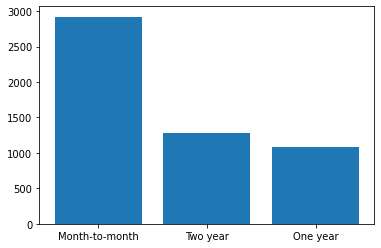

IsBillingPaperless
balanced


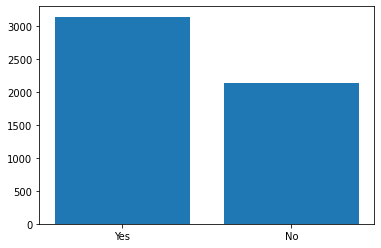

PaymentMethod
balanced


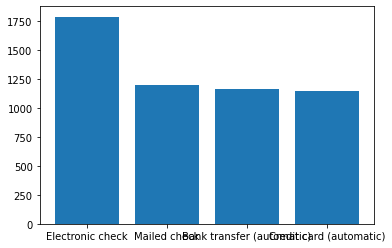

In [ ]:
def check_balanced(values):
  sum_elem = sum([values[elem] for elem in values.index])
  n = len(values.index)
  for elem in values.index:
    if ((values[elem] / sum_elem) < (1 / n - 1 / 10) or (values[elem] / sum_elem) > (1 / n + 1 / 10)):
      return False
  return True


for cat_col in cat_cols:
  values = data[cat_col].value_counts()
  print(cat_col)
  print('balanced' if check_balanced(values) else 'unbalanced')
  plt.bar(values.index, [values[elem] for elem in values.index])
  plt.show()

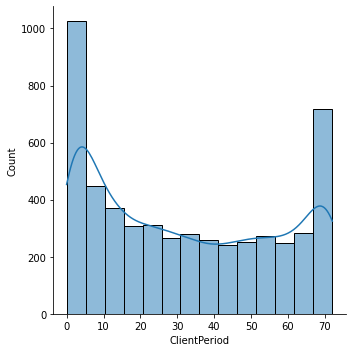

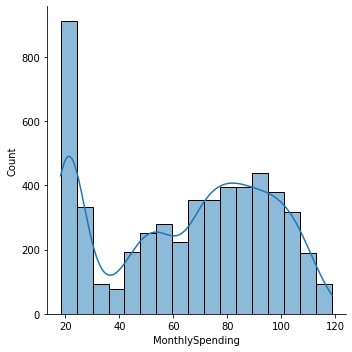

In [ ]:
#!pip install pandas_visual_analysis
from pandas_visual_analysis import VisualAnalysis
import seaborn as sns
for col in num_cols[:-1]:
  sns.displot(data=data[col], kde=True)
#gпоследняя колонка криво выглядит

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
scaler = StandardScaler()
values = data.iloc[:, :len(num_cols)].values
for i in range(len(values)):
  values[i][2] = float(values[i][2])
data_norm = scaler.fit_transform(values)
dummy_features = pd.get_dummies(data.iloc[:, len(num_cols):len(feature_cols)])
print(data_norm)
dummy_features

[[ 0.92076704 -1.50544655 -0.55585201]
 [ 1.61328776 -1.29499774 -0.18303943]
 [-1.27900465  0.36373662 -0.97476756]
 ...
 [-1.27900465 -0.32726461 -0.9839573 ]
 [-0.13838229  0.36705077 -0.03183845]
 [-0.54574742  0.36373662 -0.40191834]]


,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
5278,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0
5279,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
5280,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
X = pd.concat([pd.DataFrame(data_norm), dummy_features], axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

clf = LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001], random_state=0, refit=True, scoring='roc_auc', n_jobs=-1).fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8538379946278049
0.8268902208143626


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

качество: 0.8268902208143626 \\
параметр: 100

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

15 0.1
0:	learn: 0.6569297	total: 5.37ms	remaining: 75.2ms
1:	learn: 0.6257979	total: 10.6ms	remaining: 69.1ms
2:	learn: 0.5985790	total: 15.4ms	remaining: 61.7ms
3:	learn: 0.5762321	total: 20.2ms	remaining: 55.5ms
4:	learn: 0.5586198	total: 24.9ms	remaining: 49.8ms
5:	learn: 0.5425366	total: 30.3ms	remaining: 45.4ms
6:	learn: 0.5275584	total: 35.1ms	remaining: 40.1ms
7:	learn: 0.5150925	total: 39.9ms	remaining: 34.9ms
8:	learn: 0.5033562	total: 44.8ms	remaining: 29.8ms
9:	learn: 0.4918294	total: 49.8ms	remaining: 24.9ms
10:	learn: 0.4822898	total: 54.6ms	remaining: 19.8ms
11:	learn: 0.4740889	total: 59.3ms	remaining: 14.8ms
12:	learn: 0.4668993	total: 64ms	remaining: 9.85ms
13:	learn: 0.4602737	total: 68.8ms	remaining: 4.91ms
14:	learn: 0.4547540	total: 73.5ms	remaining: 0us


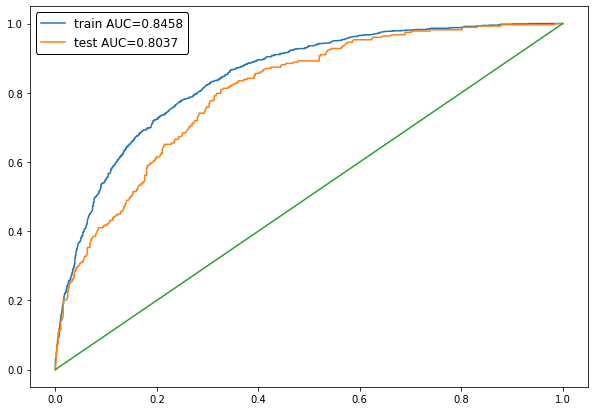

15 0.2
0:	learn: 0.6243277	total: 5.44ms	remaining: 76.2ms
1:	learn: 0.5748376	total: 10.9ms	remaining: 70.6ms
2:	learn: 0.5382246	total: 16ms	remaining: 64.2ms
3:	learn: 0.5123253	total: 20.9ms	remaining: 57.4ms
4:	learn: 0.4931656	total: 25.7ms	remaining: 51.4ms
5:	learn: 0.4735273	total: 31.2ms	remaining: 46.8ms
6:	learn: 0.4598286	total: 36.7ms	remaining: 42ms
7:	learn: 0.4493059	total: 42.1ms	remaining: 36.8ms
8:	learn: 0.4421350	total: 44.1ms	remaining: 29.4ms
9:	learn: 0.4342682	total: 49.1ms	remaining: 24.5ms
10:	learn: 0.4287755	total: 52.2ms	remaining: 19ms
11:	learn: 0.4241810	total: 57.4ms	remaining: 14.3ms
12:	learn: 0.4197331	total: 62.2ms	remaining: 9.57ms
13:	learn: 0.4154352	total: 67.1ms	remaining: 4.79ms
14:	learn: 0.4131755	total: 69.6ms	remaining: 0us


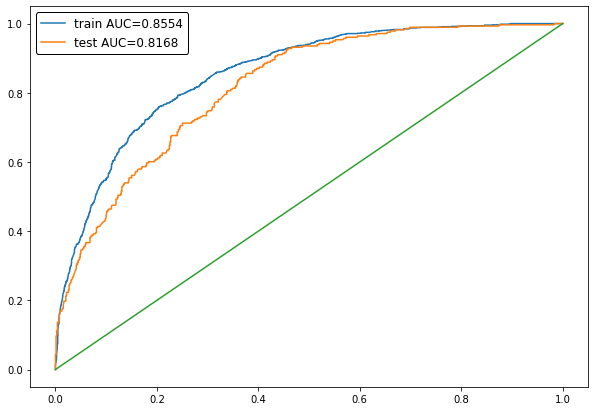

200 0.1
0:	learn: 0.6283941	total: 18.8ms	remaining: 3.74s
1:	learn: 0.5821629	total: 31.4ms	remaining: 3.11s
2:	learn: 0.5434392	total: 44.5ms	remaining: 2.92s
3:	learn: 0.5158326	total: 57.6ms	remaining: 2.82s
4:	learn: 0.4942851	total: 71.8ms	remaining: 2.8s
5:	learn: 0.4766607	total: 84.5ms	remaining: 2.73s
6:	learn: 0.4633546	total: 98.1ms	remaining: 2.71s
7:	learn: 0.4523042	total: 114ms	remaining: 2.75s
8:	learn: 0.4447545	total: 127ms	remaining: 2.69s
9:	learn: 0.4394807	total: 135ms	remaining: 2.56s
10:	learn: 0.4329126	total: 148ms	remaining: 2.54s
11:	learn: 0.4267946	total: 160ms	remaining: 2.51s
12:	learn: 0.4213730	total: 178ms	remaining: 2.56s
13:	learn: 0.4174260	total: 196ms	remaining: 2.61s
14:	learn: 0.4143866	total: 208ms	remaining: 2.57s
15:	learn: 0.4109843	total: 222ms	remaining: 2.56s
16:	learn: 0.4093054	total: 234ms	remaining: 2.52s
17:	learn: 0.4067348	total: 246ms	remaining: 2.49s
18:	learn: 0.4049393	total: 259ms	remaining: 2.47s
19:	learn: 0.4040500	total:

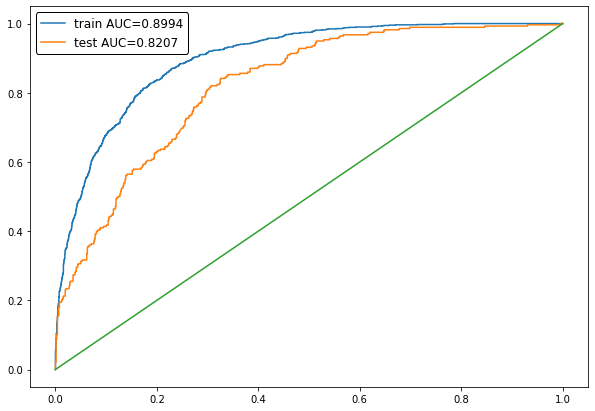

200 0.2
0:	learn: 0.5759435	total: 14.1ms	remaining: 2.81s
1:	learn: 0.5150541	total: 26.6ms	remaining: 2.63s
2:	learn: 0.4757136	total: 39.1ms	remaining: 2.57s
3:	learn: 0.4517932	total: 53.1ms	remaining: 2.6s
4:	learn: 0.4380067	total: 64.4ms	remaining: 2.51s
5:	learn: 0.4259965	total: 77.7ms	remaining: 2.51s
6:	learn: 0.4190528	total: 90ms	remaining: 2.48s
7:	learn: 0.4132937	total: 104ms	remaining: 2.51s
8:	learn: 0.4074878	total: 119ms	remaining: 2.53s
9:	learn: 0.4024083	total: 132ms	remaining: 2.52s
10:	learn: 0.3986409	total: 146ms	remaining: 2.5s
11:	learn: 0.3980555	total: 152ms	remaining: 2.37s
12:	learn: 0.3948929	total: 165ms	remaining: 2.37s
13:	learn: 0.3940202	total: 174ms	remaining: 2.31s
14:	learn: 0.3917308	total: 187ms	remaining: 2.31s
15:	learn: 0.3914188	total: 200ms	remaining: 2.3s
16:	learn: 0.3900326	total: 214ms	remaining: 2.31s
17:	learn: 0.3886114	total: 228ms	remaining: 2.3s
18:	learn: 0.3870826	total: 241ms	remaining: 2.3s
19:	learn: 0.3865531	total: 255ms

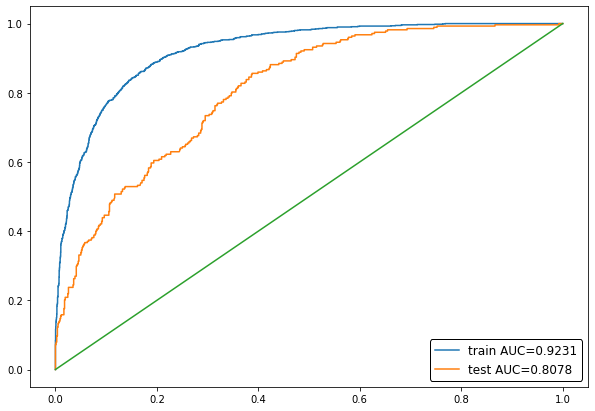

300 0.1
0:	learn: 0.6283941	total: 17.1ms	remaining: 5.11s
1:	learn: 0.5821629	total: 29.9ms	remaining: 4.45s
2:	learn: 0.5434392	total: 43.1ms	remaining: 4.27s
3:	learn: 0.5158326	total: 55.7ms	remaining: 4.12s
4:	learn: 0.4942851	total: 69.7ms	remaining: 4.11s
5:	learn: 0.4766607	total: 82.9ms	remaining: 4.06s
6:	learn: 0.4633546	total: 96.9ms	remaining: 4.06s
7:	learn: 0.4523042	total: 111ms	remaining: 4.03s
8:	learn: 0.4447545	total: 125ms	remaining: 4.03s
9:	learn: 0.4394807	total: 134ms	remaining: 3.89s
10:	learn: 0.4329126	total: 147ms	remaining: 3.87s
11:	learn: 0.4267946	total: 160ms	remaining: 3.85s
12:	learn: 0.4213730	total: 175ms	remaining: 3.87s
13:	learn: 0.4174260	total: 192ms	remaining: 3.93s
14:	learn: 0.4143866	total: 204ms	remaining: 3.88s
15:	learn: 0.4109843	total: 218ms	remaining: 3.87s
16:	learn: 0.4093054	total: 228ms	remaining: 3.8s
17:	learn: 0.4067348	total: 241ms	remaining: 3.77s
18:	learn: 0.4049393	total: 254ms	remaining: 3.75s
19:	learn: 0.4040500	total:

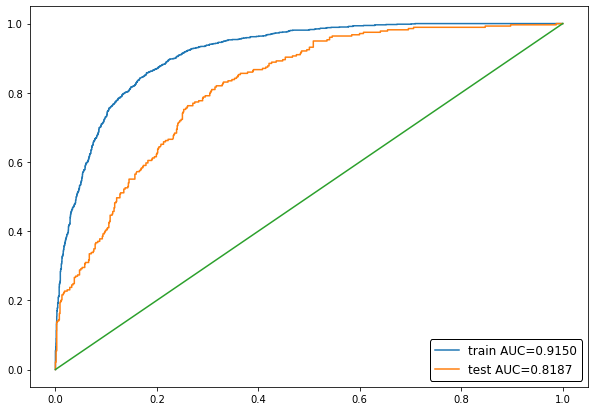

300 0.2
0:	learn: 0.5759435	total: 13.9ms	remaining: 4.16s
1:	learn: 0.5150541	total: 26.4ms	remaining: 3.93s
2:	learn: 0.4757136	total: 38.7ms	remaining: 3.84s
3:	learn: 0.4517932	total: 51ms	remaining: 3.77s
4:	learn: 0.4380067	total: 62.5ms	remaining: 3.69s
5:	learn: 0.4259965	total: 75.7ms	remaining: 3.71s
6:	learn: 0.4190528	total: 87.9ms	remaining: 3.68s
7:	learn: 0.4132937	total: 101ms	remaining: 3.67s
8:	learn: 0.4074878	total: 115ms	remaining: 3.71s
9:	learn: 0.4024083	total: 129ms	remaining: 3.75s
10:	learn: 0.3986409	total: 142ms	remaining: 3.73s
11:	learn: 0.3980555	total: 148ms	remaining: 3.56s
12:	learn: 0.3948929	total: 162ms	remaining: 3.58s
13:	learn: 0.3940202	total: 174ms	remaining: 3.56s
14:	learn: 0.3917308	total: 188ms	remaining: 3.58s
15:	learn: 0.3914188	total: 199ms	remaining: 3.52s
16:	learn: 0.3900326	total: 212ms	remaining: 3.53s
17:	learn: 0.3886114	total: 226ms	remaining: 3.54s
18:	learn: 0.3870826	total: 239ms	remaining: 3.54s
19:	learn: 0.3865531	total: 

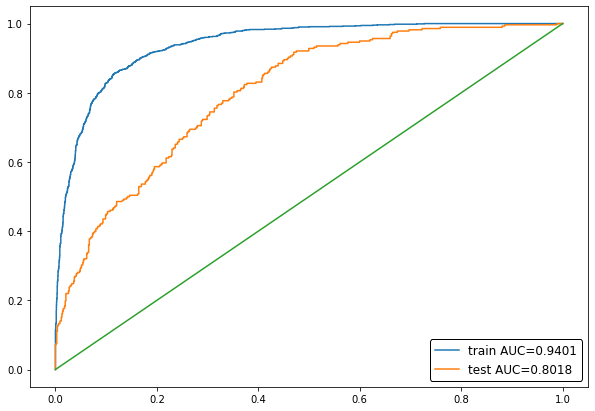

Learning rate set to 0.083391
0:	learn: 0.6382749	total: 14.3ms	remaining: 2.85s
1:	learn: 0.5970973	total: 28.2ms	remaining: 2.79s
2:	learn: 0.5610080	total: 41.4ms	remaining: 2.72s
3:	learn: 0.5329491	total: 54.3ms	remaining: 2.66s
4:	learn: 0.5112068	total: 67.8ms	remaining: 2.64s
5:	learn: 0.4930985	total: 80.4ms	remaining: 2.6s
6:	learn: 0.4800850	total: 90.6ms	remaining: 2.5s
7:	learn: 0.4681540	total: 106ms	remaining: 2.55s
8:	learn: 0.4583285	total: 118ms	remaining: 2.51s
9:	learn: 0.4494858	total: 133ms	remaining: 2.53s
10:	learn: 0.4439489	total: 144ms	remaining: 2.47s
11:	learn: 0.4371125	total: 157ms	remaining: 2.46s
12:	learn: 0.4311122	total: 175ms	remaining: 2.52s
13:	learn: 0.4264039	total: 189ms	remaining: 2.51s
14:	learn: 0.4222915	total: 210ms	remaining: 2.59s
15:	learn: 0.4190003	total: 224ms	remaining: 2.57s
16:	learn: 0.4153313	total: 236ms	remaining: 2.54s
17:	learn: 0.4132986	total: 247ms	remaining: 2.5s
18:	learn: 0.4116653	total: 257ms	remaining: 2.45s
19:	lea

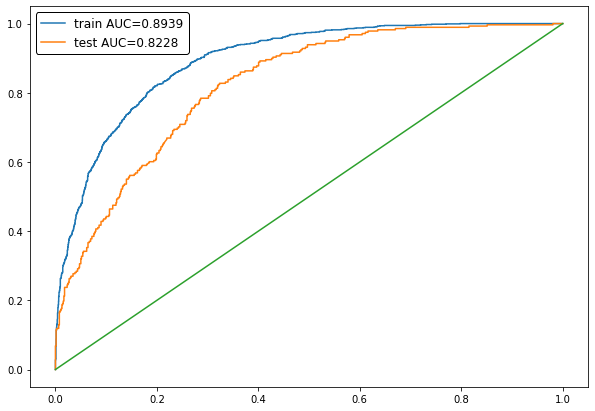

In [ ]:
#!pip install catboost
import catboost
categorical_indices = np.array([i for i in range(3, 19)])
X_train_origin, X_test_origin, _, _ = train_test_split(pd.concat([pd.DataFrame(data_norm), data.iloc[:, len(num_cols):len(feature_cols)]], axis=1), y.values, 
                                                       train_size=0.8, 
                                               random_state=42)
for n_est in [15, 200, 300]:
  for lr in [0.1, 0.2]:
    print(n_est, lr)
    boosting_model = catboost.CatBoostClassifier(n_estimators=n_est, learning_rate=lr, 
                                                cat_features=categorical_indices)

    boosting_model.fit(X_train_origin, y_train)

    y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
    y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

    train_auc = roc_auc_score(y_train, y_train_predicted)
    test_auc = roc_auc_score(y_test, y_test_predicted)

    plt.figure(figsize=(10,7))
    plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
    plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.show()

boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                            cat_features=categorical_indices)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

качество: 0.8228 \\
параметр: дефолтные \\


если указывать самому \\
качество: 0.8207 \\

параметр: 200, 0.1 \\

# Предсказания

In [ ]:
best_model = boosting_model


,Id,Churn
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
1756,1756,0.5
1757,1757,0.5
1758,1758,0.5
1759,1759,0.5


In [ ]:
# submission['Churn'] = best_model.predict_proba(X_test) / best_model.predict(X_test)
# submission.to_csv('./my_submission.csv')


values = X_test.iloc[:, :len(num_cols)].values
for i in range(len(values)):
  try:
    values[i][2] = float(values[i][2])
  except:
    values[i][2] = 0
data_norm = scaler.transform(values)
dummy_features = pd.get_dummies(X_test.iloc[:, len(num_cols):len(feature_cols)]) if best_model != boosting_model else X_test.iloc[:, len(num_cols):len(feature_cols)]
X = pd.concat([pd.DataFrame(data_norm), dummy_features], axis=1)

submission['Churn'] = 1 -  best_model.predict_proba(X)
pd.DataFrame(submission['Churn']).to_csv('./my_submission.csv')
from google.colab import files
files.download('./my_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.